<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto 11: Apertura de 200 pozos por la compañía OilyGiant

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Objetivo](#objetivo)
* [Análisis exploratorio](#analisis_expl)
    * [Importación de librerías](#imp_lib)
    * [Análisis para geo_data_0](#an_data_zero)
        * [Importación de dataset](#imp_data_zero)
        * [Exploracion de datos](#explor_zero)
        * [Valores duplicados](#duplicated_zero)
    * [Análisis para geo_data_1](#an_data_one)
        * [Importación de dataset](#imp_data_one)
        * [Exploracion de datos](#explor_one)
        * [Valores duplicados](#duplicated_one)
    * [Análisis para geo_data_2](#an_data_two)
        * [Importación de dataset](#imp_data_two)
        * [Exploracion de datos](#explor_two)
        * [Valores duplicados](#duplicated_two)    
* [Prueba de modelo](#gen_test_model)
    * [Función para datos por region](#def_gen)
    * [Función para entrenamiento y predicción](#def_gen_training_pred)
    * [Función para RMSE](#def_gen_rmse)
    * [Region geo zero](#reg_zero_tr)
    * [Region geo one ](#reg_one_tr)
    * [Region geo two](#reg_two_tr)
    * [Gráfico de predicciones vs valores reales por region](#graph_pred_gen)
* [Cálculo de ganancias](#gain_gen)
    * [Matriz de correlacion](#matrix_corr)
    * [Prueba con reentrenamiento](#test_retraining)
    * [Relación entre cada característica y el objetivo](#rel_charact_target)
    * [Función para cálculo de ganancias](#funct_ganancia)
        * [ Cálculo de ganacias por región](#calculos_gen_ganancia)
* [Boostrapping](#boots)
    * [Función para boostrapping](#function_boots)
* [Distribución de beneficios por región y beneficios promedio, intervalo de confianza y riesgo de perdidas](#distribution_hist_metrics)
* [Conclusión](#conclusion)



# Introducción <a id='intro'></a>

Nuestro cliente Oilygiant van a abrir 200 nuevos pozos y quieren saber cuáles son los mejores de las cuales ya se tienen datos sobre muestras de crudo de tres regiones

# Objetivo <a id='objetivo'></a>

El objetivo de este análisis es determinar en base a los datos cuales son los 200 mejores lugares para los pozos en base a su margen de beneficio y que sus pérdidas sean las menores

# Análisis exploratorio <a id='analisis_expl'></a>

En el siguiente apartado se observarán a detalle los datos con los que se está trabajando. Bajo las siguiente situaciones se realizarán cambios:

-Datos nulos

-Filas repetidas.

-Datos que impidan realizar el análisis por el formato en el que vienen.

## Importación de librerías<a id='imp_lib'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, f1_score, roc_curve, roc_auc_score, recall_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

## Análisis para geo_data_0<a id='an_data_zero'></a>

###  Importación de dataset <a id='imp_data_zero'></a>

In [2]:
geo_zero = pd.read_csv('/datasets/geo_data_0.csv')

### Exploracion de datos <a id='explor_zero'></a>

In [3]:
geo_zero.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_zero.describe() 

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
geo_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<span style='color:green'> Considero que el tipo de datos es correcto, al mismo tiempo no hay valores ausentes. También, los valores de los promedios de cada característica son diferentes entre sí y hay que analizarlos. Por seguridad se revisan los valores duplicados </span>

### Valores duplicados <a id='duplicated_zero'></a>

In [6]:
geo_zero.duplicated().sum()

0

[Volver a Contenidos](#back)

## Análisis para geo_data_1<a id='an_data_one'></a>

###  Importación de dataset <a id='imp_data_one'></a>

In [7]:
geo_one = pd.read_csv('/datasets/geo_data_1.csv')

### Exploracion de datos <a id='explor_one'></a>

In [8]:
geo_one.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
geo_one.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [10]:
geo_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<span style='color:green'> Considero que el tipo de datos es correcto, al mismo tiempo no hay valores ausentes. También, los valores de los promedios de cada característica son diferentes entre sí pero son mayores que geo0 y al mismo tiempo tiene menos reservas. Por seguridad se revisan los valores duplicados </span>

### Valores duplicados <a id='duplicated_one'></a>

In [11]:
geo_one.duplicated().sum()

0

[Volver a Contenidos](#back)

## Análisis para geo_data_2<a id='an_data_two'></a>

###  Importación de dataset <a id='imp_data_two'></a>

In [12]:
geo_two = pd.read_csv('/datasets/geo_data_2.csv')

### Exploracion de datos <a id='explor_two'></a>

In [13]:
geo_two.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [14]:
geo_two.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [15]:
geo_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<span style='color:green'> Considero que el tipo de datos es correcto, al mismo tiempo no hay valores ausentes. También, los valores de los promedios de cada característica son diferentes entre sí pero f0 y f2 tienden a ser negativas. Al mismo tiempo tiene mas reservas que las otras 2. Por seguridad se revisan los valores duplicados </span>

### Valores duplicados <a id='duplicated_two'></a>

In [16]:
geo_two.duplicated().sum()

0

[Volver a Contenidos](#back)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de leer los datos de todas las regiones y de hacer una revisión inicial
</div>


# Prueba de modelo <a id='gen_test_model'></a>

In [17]:
def remove_outliers(data, columns, threshold=3):
    for column in columns:
        mean = data[column].mean()
        std = data[column].std()
        data = data[(data[column] >= mean - threshold * std) & (data[column] <= mean + threshold * std)]
    return data

columns = ["f0", "f1", "f2", "product"]

## Función para datos por region <a id='def_gen'></a>

In [18]:
def general_data (region):
    data = region
    features = data[['f0', 'f1', 'f2']]
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=98765
    )
    
    #Normalización 
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    return features_train, features_valid, target_train, target_valid

## Función para entrenamiento y predicción <a id='def_gen_training_pred'></a>

In [19]:
def training_predictions (features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    return predicted_valid, model

## Función para RMSE <a id='def_gen_rmse'></a>

In [20]:
def rmse (target_valid,predicted_valid):
    mse = mean_squared_error(target_valid,predicted_valid)
    print("RMSE = ", mse ** 0.5)
    print(f"Volumen medio de reservas en conjunto de validacion = {target_valid.mean()}")
    print(f"Volumen medio de reservas en predicciones del modelo = {predicted_valid.mean()} ")



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hacer funciones para evitar repetir código es una buena práctica. Las funciones que has realizado me parecen ordenadas y con los parametros necesarios
</div>


[Volver a Contenidos](#back)

## Region geo zero <a id='reg_zero_tr'></a>

In [21]:
features_train_zero, features_valid_zero, target_train_zero, target_valid_zero = general_data(geo_zero)


In [22]:
predicted_valid_zero, model_zero = training_predictions (features_train_zero, features_valid_zero, target_train_zero, target_valid_zero)

In [23]:
rmse(target_valid_zero,predicted_valid_zero)

RMSE =  37.913370548223924
Volumen medio de reservas en conjunto de validacion = 92.88465399099115
Volumen medio de reservas en predicciones del modelo = 92.50230351497615 


## Region geo one <a id='reg_one_tr'></a>

In [24]:
features_train_one, features_valid_one, target_train_one, target_valid_one = general_data(geo_one)

In [25]:
predicted_valid_one, model_one = training_predictions (features_train_one, features_valid_one, target_train_one, target_valid_one)

In [26]:
rmse(target_valid_one,predicted_valid_one)

RMSE =  0.890200004734105
Volumen medio de reservas en conjunto de validacion = 69.11272813483947
Volumen medio de reservas en predicciones del modelo = 69.12360237449505 


## Region geo two <a id='reg_two_tr'></a>

In [27]:
features_train_two, features_valid_two, target_train_two, target_valid_two = general_data(geo_two)

In [28]:
predicted_valid_two, model_two = training_predictions (features_train_two, features_valid_two, target_train_two, target_valid_two)

In [29]:
rmse(target_valid_two,predicted_valid_two)

RMSE =  39.98229419227282
Volumen medio de reservas en conjunto de validacion = 94.90127025217468
Volumen medio de reservas en predicciones del modelo = 94.98471201137805 


<span style='color:green'> Las 3 regiones tienen un promedio de reservas en sus predicciones bastante parecidos a los valores reales pero cuando vemos el RMSE (aún normalizando los datos) se aprecia que la region que tiene más precisión en su modelo en la Region 1 ya que en esta podríamos confiar en que nuestro modelo pudo relacionar las característica de mejor forma y al momento de predecir se puede confiar. A comparación de Region 0 o 2, las cuales el modelo tiene problemas para interpretar estas características. </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Las observaciones que haces me parecen bastante acertadas, la Región 1 es la que muestra los datos más parecidos a los reales
</div>


## Gráfico de predicciones vs valores reales por region <a id='graph_pred_gen'></a>

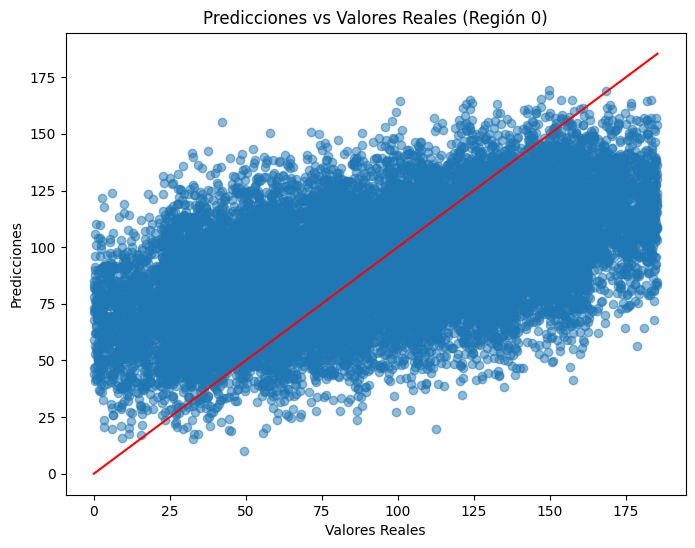

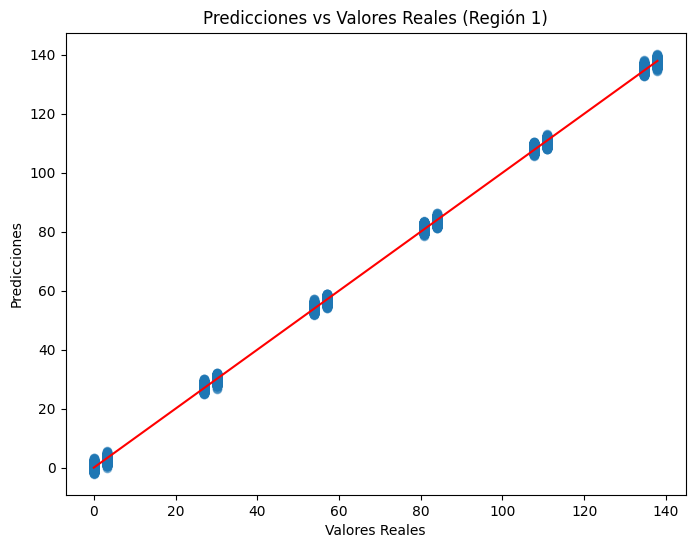

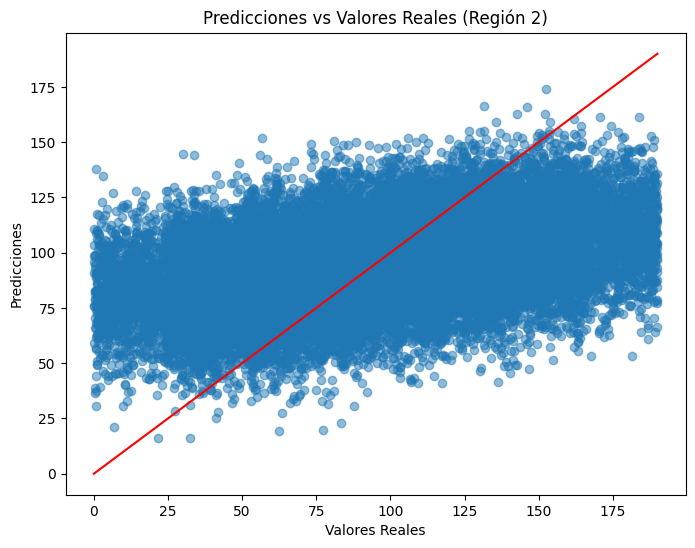

In [30]:
def plot_predictions(target_valid, predicted_valid, region_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(target_valid, predicted_valid, alpha=0.5)
    plt.title(f"Predicciones vs Valores Reales ({region_name})")
    plt.xlabel("Valores Reales")
    plt.ylabel("Predicciones")
    plt.plot([target_valid.min(), target_valid.max()],
             [target_valid.min(), target_valid.max()], color='red')
    plt.show()

plot_predictions(target_valid_zero, predicted_valid_zero, "Región 0")
plot_predictions(target_valid_one, predicted_valid_one, "Región 1")
plot_predictions(target_valid_two, predicted_valid_two, "Región 2")


<span style='color:green'> En los 3 gráficos podemos corroborar la información del RMSE, tanto region 0 y 2 hay demasiada dispersion respecto a la línea roja por lo que las predicciones no son perfectas. El mejro gráfico es de la región 1 donde se aprecia que las predicciones dadas por el modelo son más precisas y por eso están más cerca de la línea roja.</span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de presentar los datos, es fácil ver las diferencias entre cada una de las regiones
</div>


[Volver a Contenidos](#back)

# Cálculo de ganancias <a id='gain_gen'></a>

## Matriz de correlacion <a id='matrix_corr'></a>

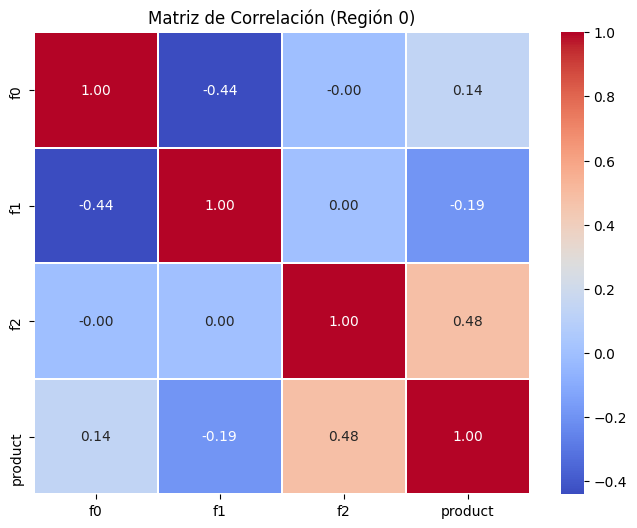

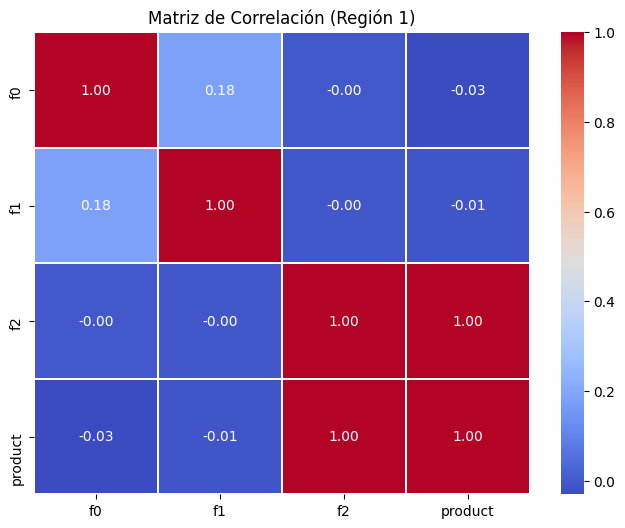

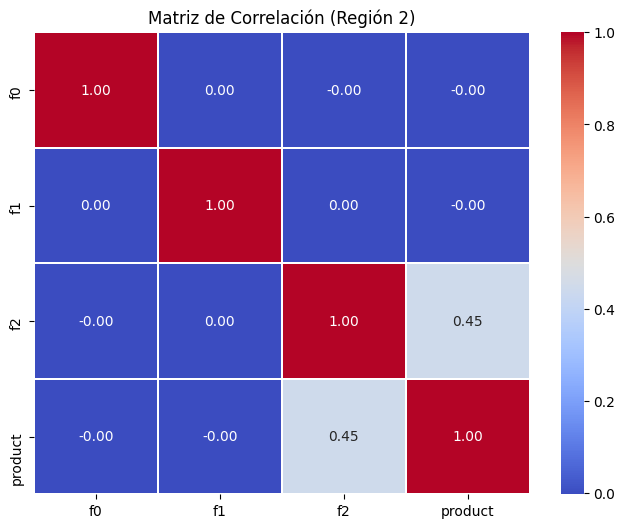

In [31]:
def plot_correlation_matrix(data, title):
    plt.figure(figsize=(8, 6))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Matriz de Correlación ({title})')
    plt.show()
    
plot_correlation_matrix(geo_zero, "Región 0")
plot_correlation_matrix(geo_one, "Región 1")
plot_correlation_matrix(geo_two, "Región 2")


<span style='color:green'> Antes de avanzar más hay que observar la relacion de las caracteristicas cual es el impacto sobre el objetivo y como podemos observar en la región 1 y 2 las características 'f0 y f1' no tienen una relacion con nuestro objetivo por lo que se deben hacer cambios ya que no son relevantes apra nuestro modelo y podría caer en la redundancia a la hora de entrenarlo, y tendriamos mejores resultados</span>

## Prueba con reentrenamiento <a id='test_retraining'></a>

In [32]:
def general_data_single_feature(region, feature_name):
    data = region
    features = data[[feature_name]] 
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=98765
    )
    
    
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    return features_train, features_valid, target_train, target_valid

# Reentrenamiento en Región 1 y 2 con solo f2
features_train_one_f2, features_valid_one_f2, target_train_one_f2, target_valid_one_f2 = general_data_single_feature(geo_one, 'f2')
predicted_valid_one_f2, model_one_f2 = training_predictions(features_train_one_f2, features_valid_one_f2, target_train_one_f2, target_valid_one_f2)
rmse(target_valid_one_f2, predicted_valid_one_f2)

features_train_two_f2, features_valid_two_f2, target_train_two_f2, target_valid_two_f2 = general_data_single_feature(geo_two, 'f2')
predicted_valid_two_f2, model_two_f2 = training_predictions(features_train_two_f2, features_valid_two_f2, target_train_two_f2, target_valid_two_f2)
rmse(target_valid_two_f2, predicted_valid_two_f2)


RMSE =  1.5946034482258298
Volumen medio de reservas en conjunto de validacion = 69.11272813483947
Volumen medio de reservas en predicciones del modelo = 69.11514459344919 
RMSE =  39.9807440429904
Volumen medio de reservas en conjunto de validacion = 94.90127025217468
Volumen medio de reservas en predicciones del modelo = 94.98459690229188 


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

LA manera de dividir y entrenar los datos me parece acertada
</div>


<span style='color:green'> En el caso de la region 1 a pesar de que las otras regiones no suponen un gran peso en el modelo sí lo mejoran un poco y al mismo tiempo el RMSE por ser tan bajo quiere decir que también podría trabajar sin estas otras dos características. En la region 2 la diferencia es mínima esto quiere decir que la característica f2 tiene el mayor peso sobre el modelo. De igual forma por no ser de gran diferencia quitar esas 2 características decido seguir trabajando con todas las características </span>

[Volver a Contenidos](#back)

## Relación entre cada característica y el objetivo <a id='rel_charact_target'></a>

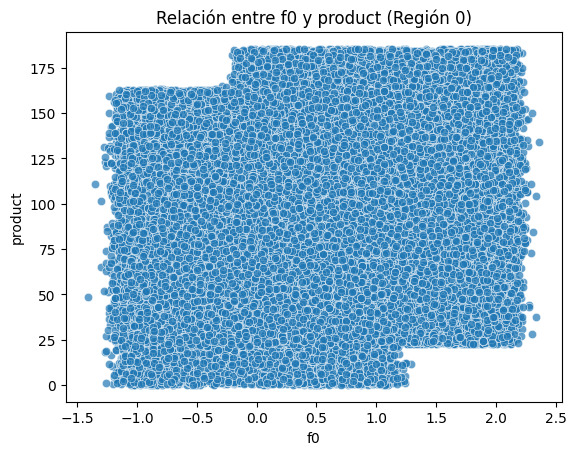

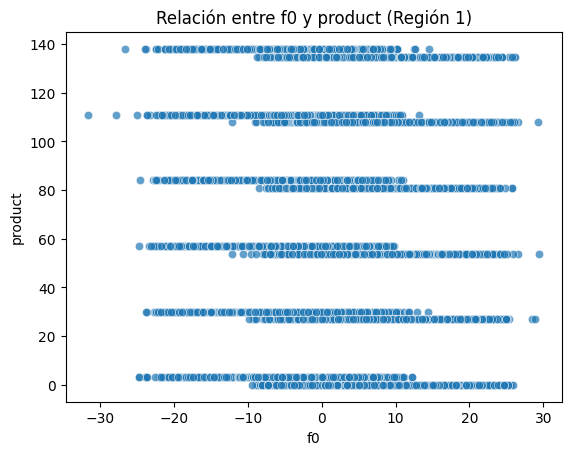

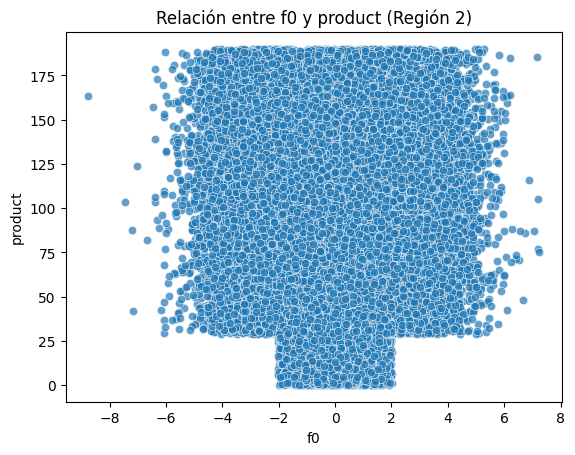

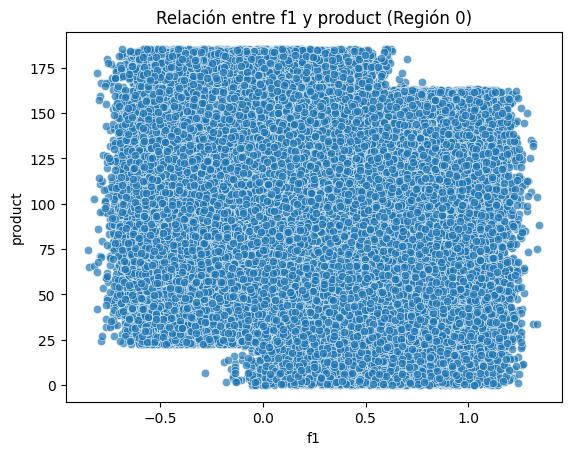

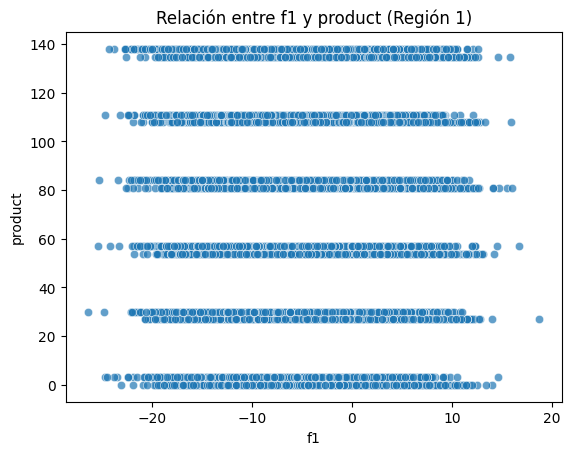

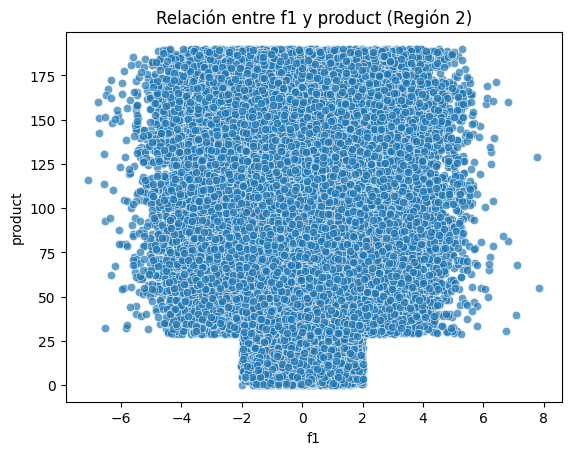

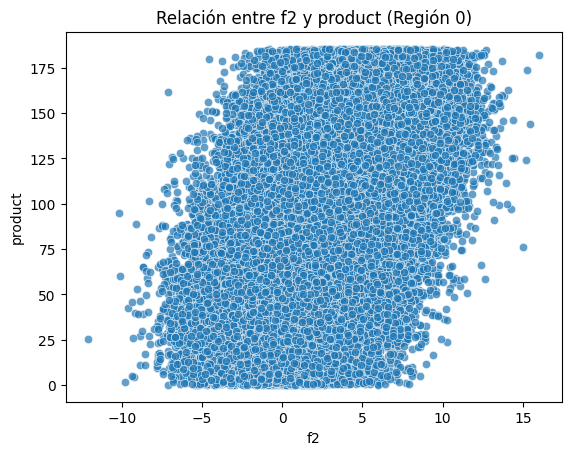

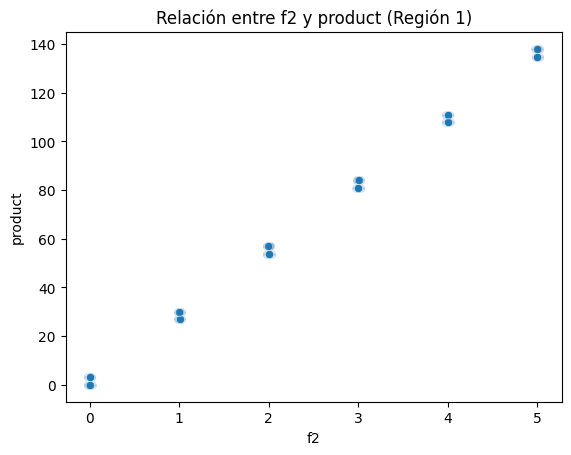

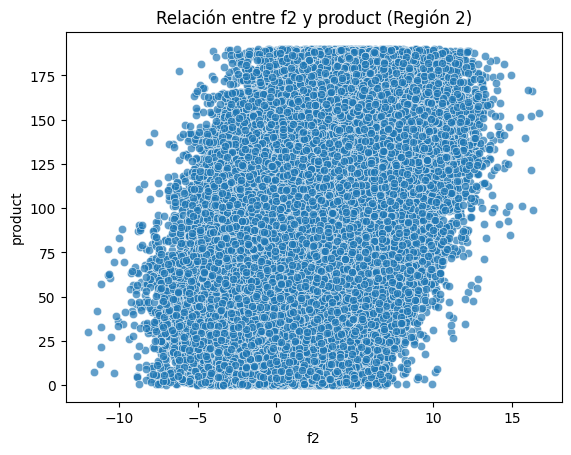

In [33]:
def plot_feature_target_relationship(data, feature, target, title):
    sns.scatterplot(data=data, x=feature, y=target, alpha=0.7)
    plt.title(f'Relación entre {feature} y {target} ({title})')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

for feature in ['f0', 'f1', 'f2']:
    plot_feature_target_relationship(geo_zero, feature, 'product', "Región 0")
    plot_feature_target_relationship(geo_one, feature, 'product', "Región 1")
    plot_feature_target_relationship(geo_two, feature, 'product', "Región 2")


<span style='color:green'> Ninguna región tiene un volumen medio igual o mayor a 111.1 unidades, por lo cual pareciera que ninguna región cuenta con una ganancia, sin embargo como apreciamos en la relacion de las características con el producto podemos ver que todas las regiones tienen mas de 200 pozos con un volumen mayor a 111.1 unidades.    </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Las observaciones que haces son buenas, ninguna pareciera cumplir con el requerimiento basico de un volumen mayor a 111, pero el analisis continúa dandonos otra información
</div>


## Función para cálculo de ganancias <a id='funct_ganancia'></a>

In [34]:


def ganancias(predictions, target_valid, ingreso, num_pozos, costo, imprimir=True):
    data = pd.DataFrame({'prediction': predictions, 'product': target_valid}).reset_index(drop=True)
    data = data.sort_values(by="prediction", ascending=False)
    top = data.head(num_pozos)
    ingresos = top["product"].sum() * ingreso
    beneficio_bruto = ingresos - (costo * num_pozos)
    if imprimir:
        print(f"Ingresos generados por los {num_pozos} mejores pozos: ${ingresos:,.2f}")
        print(f"Beneficio bruto: ${beneficio_bruto:,.2f}")
    return beneficio_bruto

<span style='color:green'> Para tener los beneficios centrados en el beneficio bruto he decidido remover los outliers para que no afecten en los siguientes cálculos ya que pueden ser o muy bajos o muy altos y por lo tanto podría haber un sesgo importante y restarle veracidad a la siguiente información   </span>

### Cálculo de ganacias por región <a id='calculos_gen_ganancia'></a>

In [35]:
# Parámetros
ingreso = 4500
num_pozos = 200
costo = 500000
columns = ["f0", "f1", "f2", "product"]

# Bucle para cada región 
for i, file_path in enumerate(["/datasets/geo_data_0.csv", "/datasets/geo_data_1.csv", "/datasets/geo_data_2.csv"]):
    print(f"Región {i}:")
    data = pd.read_csv(file_path)
    data_filtered = remove_outliers(data, columns)
    ganancias(data_filtered["product"], data_filtered["product"], ingreso, num_pozos, costo)



Región 0:
Ingresos generados por los 200 mejores pozos: $166,348,989.09
Beneficio bruto: $66,348,989.09
Región 1:
Ingresos generados por los 200 mejores pozos: $124,150,866.97
Beneficio bruto: $24,150,866.97
Región 2:
Ingresos generados por los 200 mejores pozos: $170,588,272.13
Beneficio bruto: $70,588,272.13


<span style='color:green'> De acuerdo a las condiciones dadas, las 3 regiones cumples con los requisitos para ser rentables pero la región más rentable es la Región 2 con su beneficio bruto es $70,588,272.13   </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, buena manera de encontrar estos resultados
</div>


# Boostrapping <a id='boots'></a>

## Función para boostrapping <a id='function_boots'></a>

In [36]:

# Función de bootstrapping
def bootstrap(data, ingreso, num_pozos, costo, n_samples=1000, random_state=12345):
   
    state = np.random.RandomState(random_state)
    beneficios = []

    for _ in range(n_samples):
        sample = data.sample(frac=1, replace=True, random_state=state)
        beneficio_bruto = ganancias(sample['prediction'], sample['product'], ingreso, num_pozos, costo, imprimir=False)
        beneficios.append(beneficio_bruto)

    return pd.Series(beneficios)



# Distribución de beneficios por región y beneficios promedio, intervalo de confianza y riesgo de perdidas <a id='distribution_hist_metrics'></a>

Región 0:
Beneficio promedio (bootstrapping): $66,347,498.85
Intervalo de confianza del 95%: [$66,280,570.28, $66,419,595.80]
Riesgo de pérdida: 0.00%



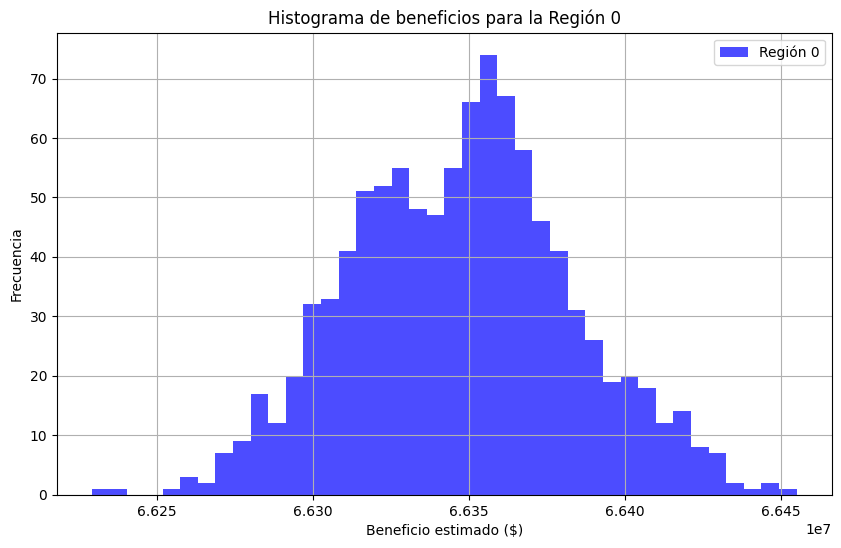

Región 1:
Beneficio promedio (bootstrapping): $24,150,866.97
Intervalo de confianza del 95%: [$24,150,866.97, $24,150,866.97]
Riesgo de pérdida: 0.00%



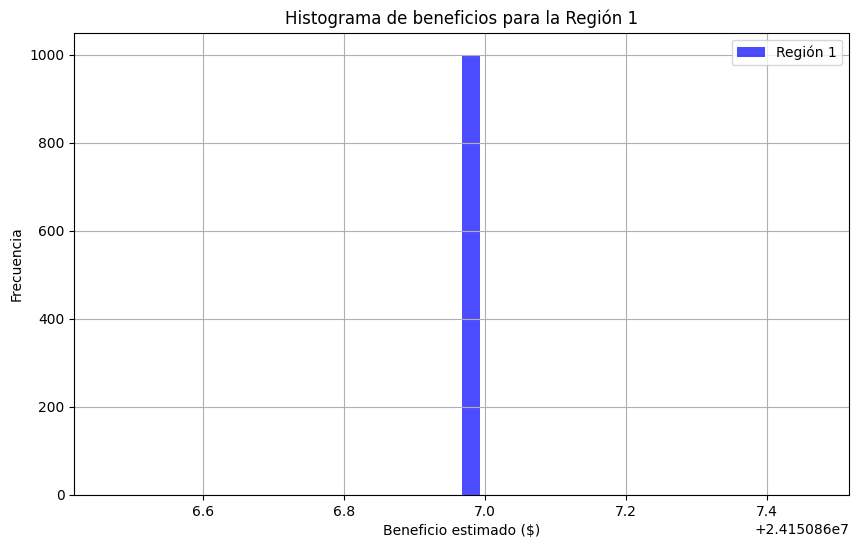

Región 2:
Beneficio promedio (bootstrapping): $70,588,212.31
Intervalo de confianza del 95%: [$70,506,640.55, $70,660,263.82]
Riesgo de pérdida: 0.00%



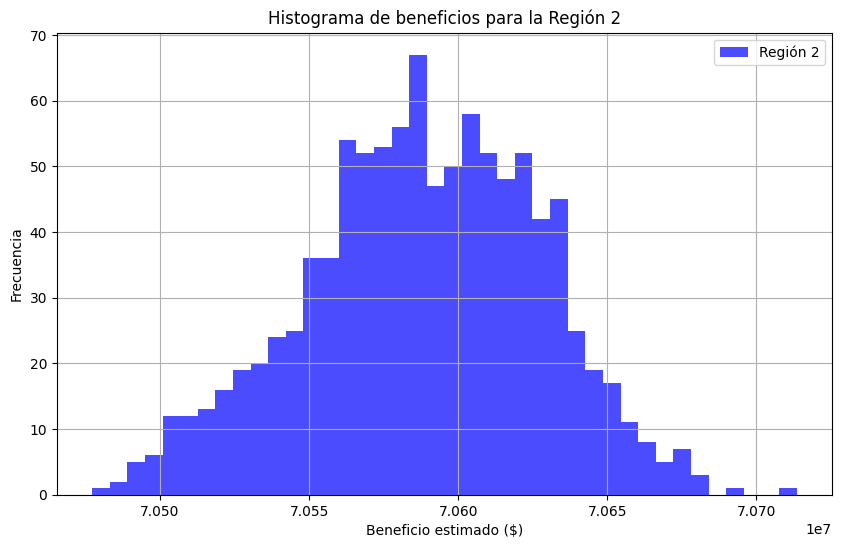

In [37]:
# Parámetros
ingreso = 4500
num_pozos = 200
costo = 500000
columns = ["f0", "f1", "f2", "product"]

# Proceso para cada región
for i, file_path in enumerate(["/datasets/geo_data_0.csv", "/datasets/geo_data_1.csv", "/datasets/geo_data_2.csv"]):
    print(f"Región {i}:")
    
    # Carga de datos
    data = pd.read_csv(file_path)
    predictions = data['prediction'] if 'prediction' in data.columns else data['product']
    data_filtered = remove_outliers(data, columns)
    data_filtered['prediction'] = predictions.loc[data_filtered.index]

    # Distribución de beneficios con bootstrapping
    bootstrap_benefits = bootstrap(data_filtered, ingreso, num_pozos, costo)

    # Cálculo de métricas 
    mean_profit = bootstrap_benefits.mean()
    lower_95, upper_95 = bootstrap_benefits.quantile([0.025, 0.975])
    risk_of_loss = (bootstrap_benefits < 0).mean() * 100

   
    print(f"Beneficio promedio (bootstrapping): ${mean_profit:,.2f}")
    print(f"Intervalo de confianza del 95%: [${lower_95:,.2f}, ${upper_95:,.2f}]")
    print(f"Riesgo de pérdida: {risk_of_loss:.2f}%\n")

    # Visualización con un histograma
    plt.figure(figsize=(10, 6))
    plt.hist(bootstrap_benefits, bins=40, color='blue', alpha=0.7, label=f'Región {i}')
    plt.title(f'Histograma de beneficios para la Región {i}')
    plt.xlabel('Beneficio estimado ($)')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.show()

<span style='color:green'> La región 2 sigue demostrando que es la mejor, desde el intervalo de confianza que ofrece hasta su beneficio promedio. La siguiente región que sigue los paso de la region 2 es la region 0, que también es un buen prospecto. La región 1 es la que menos ofrece beneficios promedio pero al mismo tiempo tampoco supone un riesgo de pérdida ya que se producción es suficiente pero no es la óptima para ser la opción a elegir para la apertura de los pozos </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Con las graficas es más fácil ver las diferencias entre las tres regiones
</div>


[Volver a Contenidos](#back)

# Conclusión <a id='conclusion'></a>

<span style='color:green'> En un principio había comenzado a realizar el análisis sin quitar los outliers (no incluí esa parte aquí para hacerlo más fluído) pero el beneficio promedio era mejor en la Región 1 -aparentemente- pero al quitarlos cambió completamente el panorama. El beneficio bruto y el beneficio promedio demostró mejor desempeño en la Región 2 con un total de $70,588,212.31 lo cual lo situa como la mejor región para que OilyGiant abra los 200 pozos con ese presupuesto. Toda la información que ha proporcionado el análisis indicaría a los inversionistas, que incluso se podrían abrir pozos en las otras zonas ya que de acuerdo a las métricas utilizadas ninguna supone pérdidas debido a su producción pero en beneficios la segunda mejor sería la Región 0 </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso y los procedimientos realizados son correctos, esta es una gran herramienta que nos ayuda en muchos casos y es bastante útil en proyectos reales.<br/>
    
El documento que entregas es organizado y fácil de entender.<br/> 
La conclusión a la que llegas nos demuestra la importancia de contar con las habilidades y conocimientos para limpiar un set de datos de la manera correcta.

Este tipo de analisis nos ayuda a confirmar suposiciones o apoyar decisiones de negocio las cuales muchas veces entre más puntos de vista se analisen mejores resultados se obtendrán al final.
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>
